In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import pingouin as pg
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_data_dir(data_name : str) :
    curr_dir = os.getcwd()
    data_dir = curr_dir + "/" + data_name

    return data_dir

def get_data_dict( data_name ) :
    data_dir = get_data_dir(data_name)
    parti_list = os.listdir(data_dir)
    parti_list = [ x for x in parti_list if not x.startswith(".")]
    parti_dict = { x.split(sep='.')[0] : np.load(data_dir + "/" + x) if x.endswith(".npy") \
                  else pd.read_csv(data_dir + "/" + x, index_col=0 ).values for x in parti_list}

    return parti_dict

def dict_sort( data_dict ) : 
    sorted_dict = dict(sorted(data_dict.items()))

    return sorted_dict

def key_str2int( data_dict ) : 
    data_dict = { int(key.split(sep='_')[0]) : value for key, value in data_dict.items() }

    return data_dict
    

def get_data_arr( data_dict) :
    
    data_dict = dict_sort(data_dict)

    arr = [ value for key, value in data_dict.items() ]

    arr = np.array(arr)

    return arr

In [3]:
ssq_dict = get_data_dict('SSQ')
rating_dict = get_data_dict('Dynamic_rating')
feature_dict = get_data_dict('Feature')
v_dict = get_data_dict('HSV')

feature_dict = key_str2int(feature_dict)
v_dict = key_str2int(v_dict)

In [4]:
for key, value in feature_dict.items() : 
    feature_dict[key] = value[:3600]

In [5]:
ssq_arr = get_data_arr(ssq_dict)
rating_arr = get_data_arr(rating_dict)
feature_arr = get_data_arr(feature_dict)
v_arr = get_data_arr(v_dict)

In [6]:
print(ssq_arr.shape)
print(rating_arr.shape)
print(feature_arr.shape)
print(v_arr.shape)

(28, 30, 5)
(30, 7150, 20)
(20, 3600)
(20, 3600, 256, 256)


In [7]:
arr1 = rating_arr.mean(axis=(0,1))[[0,1,2,3,4,10,11,12,13,14]]
arr2 = rating_arr.mean(axis=(0,1))[[5,6,7,8,9,15,16,17,18,19]]

pg.ttest(arr1.flatten(),arr2.flatten(), paired=True ,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.586061,9,greater,0.286118,"[-0.09, inf]",0.063856,0.714,0.072477


In [8]:
arr1 = rating_arr.mean(axis=(0,1))[:10]
arr2 = rating_arr.mean(axis=(0,1))[10:]

pg.ttest(arr1,arr2, paired=True ,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,17.561251,9,greater,1.424706e-08,"[1.13, inf]",7.280185,7.028e+05,1.0


In [9]:
arr1 = feature_arr.mean(axis=1)[:10]
arr2 = feature_arr.mean(axis=1)[10:]

pg.ttest(arr1,arr2, paired=False ,alternative='greater')


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,4.446354,18,greater,0.000156,"[255.92, inf]",1.98847,153.648,0.995687


In [10]:
arr1 = feature_arr.mean(axis=1)[:5]
arr2 = feature_arr.mean(axis=1)[5:10]

pg.ttest(arr1,arr2, paired=False ,alternative='greater')


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.554158,8,greater,0.016977,"[101.51, inf]",1.615392,4.715,0.753436


In [11]:
arr1 = feature_arr.mean(axis=1)[10:15]
arr2 = feature_arr.mean(axis=1)[15:]

pg.ttest(arr1,arr2, paired=False ,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.024513,8,greater,0.000511,"[55.74, inf]",3.177781,53.748,0.998173


In [12]:
arr1 = v_arr.mean(axis=(1,2,3))[[0,1,2,3,4,10,11,12,13,14]]
arr2 = v_arr.mean(axis=(1,2,3))[[5,6,7,8,9,15,16,17,18,19]]

pg.ttest(arr1,arr2, paired=False ,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.569466,18,greater,0.000014,"[48.32, inf]",2.490741,1179.347,0.999893


In [13]:
arr1 = v_arr.mean(axis=(1,2,3))[[0,1,2,3,4]]
arr2 = v_arr.mean(axis=(1,2,3))[[10,11,12,13,14]]

pg.ttest(arr1,arr2, paired=False ,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.309368,8,greater,0.005354,"[19.37, inf]",2.093028,9.957,0.914289


In [14]:
arr1 = v_arr.mean(axis=(1,2,3))[[10,11,12,13,14]]
arr2 = v_arr.mean(axis=(1,2,3))[[15,16,17,18,19]]

pg.ttest(arr1,arr2, paired=False ,alternative='greater')

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.543291,8,greater,0.000014,"[51.05, inf]",5.403252,970.273,1.0


In [15]:
data = rating_arr.mean(axis=1).reshape(-1,4,5).mean(axis=2).flatten()
blocks = [ "HMHB", "HMLB", "LMHB", "LMLB"] * len(rating_arr)
names = np.repeat(np.arange(30),4)

df = pd.DataFrame( { 'names' : names, 'rating' : data, 'blocks': blocks})
results = pg.rm_anova( data= df, dv='rating', within='blocks', subject='names', correction=True)
print(results)


post_hoc = pg.pairwise_tests(data= df, dv='rating', within='blocks', subject='names', padjust='bonf')
print("-"*100,'\n')
print(post_hoc)
print("="*100,'\n') 


   Source  ddof1  ddof2          F         p-unc     p-GG-corr      ng2  \
0  blocks      3     87  45.098641  1.117542e-17  8.802466e-12  0.35645   

        eps  sphericity   W-spher   p-spher  
0  0.617534       False  0.390766  0.000088  
---------------------------------------------------------------------------------------------------- 

  Contrast     A     B  Paired  Parametric         T   dof alternative  \
0   blocks  HMHB  HMLB    True        True  0.891977  29.0   two-sided   
1   blocks  HMHB  LMHB    True        True  8.235678  29.0   two-sided   
2   blocks  HMHB  LMLB    True        True  7.020418  29.0   two-sided   
3   blocks  HMLB  LMHB    True        True  7.253826  29.0   two-sided   
4   blocks  HMLB  LMLB    True        True  6.811625  29.0   two-sided   
5   blocks  LMHB  LMLB    True        True -0.015480  29.0   two-sided   

          p-unc        p-corr p-adjust       BF10    hedges  
0  3.797469e-01  1.000000e+00     bonf       0.28  0.105740  
1  4.429431

In [16]:
for key, value in ssq_dict.items():
    data = ssq_dict[key][:,1:].flatten()
    blocks = [ "HMHB", "HMLB", "LMHB", "LMLB"] * len(ssq_dict[key])
    names = np.repeat(np.arange(30),4)
    df = pd.DataFrame( { 'names' : names, 'rating' : data, 'blocks': blocks})
    results = pg.rm_anova( data= df, dv='rating', within='blocks', subject='names', correction=True)

    if results['p-unc'].values <= 0.05 / 28 :
        post_hoc = pg.pairwise_tests(data= df, dv='rating', within='blocks', subject='names', padjust='bonf')
        print(key)
        print(results['F'].values, results['p-unc'].values)
        print("-"*100,'\n')
        print(post_hoc)
        print("="*100,'\n')


Feeling heavy in the head
[6.19838689] [0.00072466]
---------------------------------------------------------------------------------------------------- 

  Contrast     A     B  Paired  Parametric         T   dof alternative  \
0   blocks  HMHB  HMLB    True        True -0.559168  29.0   two-sided   
1   blocks  HMHB  LMHB    True        True  2.947142  29.0   two-sided   
2   blocks  HMHB  LMLB    True        True  1.649929  29.0   two-sided   
3   blocks  HMLB  LMHB    True        True  3.314934  29.0   two-sided   
4   blocks  HMLB  LMLB    True        True  3.180610  29.0   two-sided   
5   blocks  LMHB  LMLB    True        True -2.009471  29.0   two-sided   

      p-unc    p-corr p-adjust    BF10    hedges  
0  0.580340  1.000000     bonf   0.225 -0.078712  
1  0.006272  0.037630     bonf   6.699  0.447308  
2  0.109749  0.658493     bonf   0.651  0.228390  
3  0.002470  0.014819     bonf  14.988  0.541633  
4  0.003487  0.020921     bonf  11.108  0.319438  
5  0.053874  0.32324

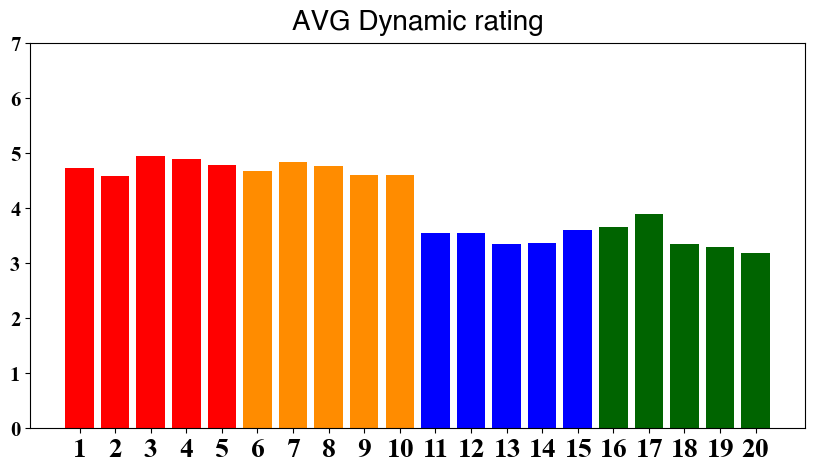

In [17]:
arr = rating_arr.mean(axis=(0,1))

fig = plt.figure( figsize= (10,5))

colors = [ 'r', 'darkorange', 'b','darkgreen']
font_dict = {'family': 'Helvetica',
      'color':  'black',
      'weight': 'bold',
      'size': 20,
      'va' : 'center',
      'ha' : 'center' }


plt.bar(range(1,21), arr, color = np.repeat(colors,5));
plt.ylim(0,7);
plt.yticks(family = 'Times New Roman', size = 15, weight = 'bold');
plt.xticks( range(1,21), range(1,21), family = 'Times New Roman', size = 20, weight = 'bold');
plt.title("AVG Dynamic rating", fontdict=font_dict, pad=15);

[4.7910159643072285, 4.701447000285426, 3.4810739792259775, 3.482749108488594]
[0.13131532862513828, 0.09323307039495447, 0.10491973639395497, 0.2600355133215685]


Text(0, 0.5, 'AVG Dynamic rating')

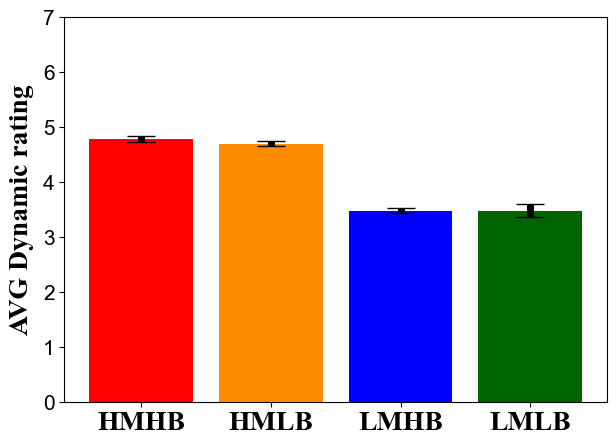

In [111]:
arr = []
for parti in rating_dict :  
    arr.append(rating_dict[parti])

arr = np.array(arr)
block_arr = arr.mean(axis=(0,1))
block_std =  [ np.std(block_arr[x:x+5]) for x in range(0,20,5)]
block_se = [ np.std(block_arr[x:x+5]) / np.sqrt(5) for x in range(0,20,5)]
block_arr = [ block_arr[x:x+5].mean() for x in range(0,20,5)]

colors = [ 'r', 'darkorange', 'b','darkgreen']
font_dict = {'family': 'Times New Roman',
      'color':  'black',
      'weight': 'bold',
      'size': 20,
      'va' : 'center',
      'ha' : 'center' }

print(block_arr)
print(block_std)
fig = plt.figure(figsize=(7,5))
plt.bar( range(len(block_arr)), block_arr, color=colors)
plt.xticks(range(4), ["HMHB", "HMLB", "LMHB","LMLB"] , family = 'Times New Roman', size = 20, weight = 'bold')
plt.yticks(family = 'Arial' , size = 15)
plt.ylim(0,7)
plt.errorbar(range(4), block_arr ,yerr =block_se, linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 
# plt.title("Dynamic Rating", fontdict=font_dict, pad=15)
plt.ylabel('AVG Dynamic rating' ,fontdict=font_dict, labelpad=15)

# y = [ 5.1,5.1,3.8,3.8]
# for i, blc in enumerate(block_arr): 
#     plt.text(x = i, y= y[i], s= round(blc, 3), fontdict=font_dict, color='black')

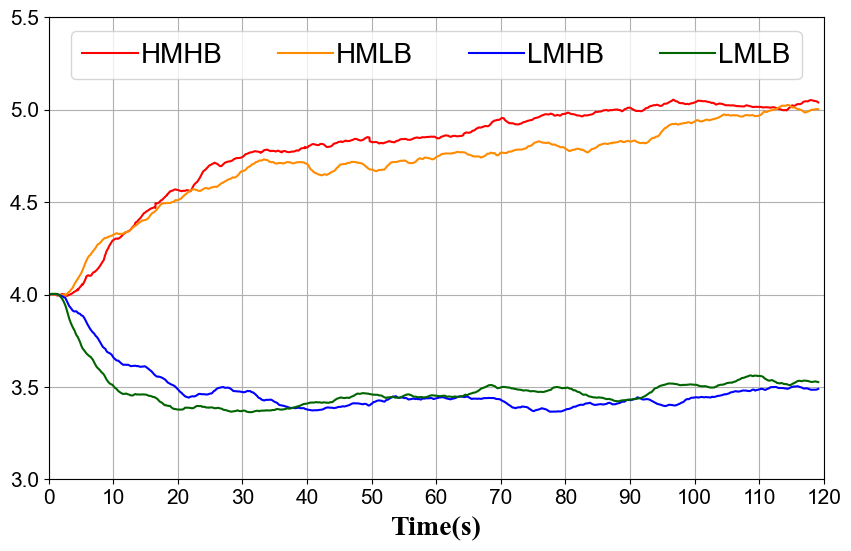

In [107]:
block_arr = arr.reshape(arr.shape[0], arr.shape[1],4,5).mean(axis=(0,3))

fig = plt.figure(figsize=(10,6))

for block in range(block_arr.shape[1]) :
    plt.plot( range(len(block_arr)), block_arr[:,block], color = colors[block])

legend_font_dict = {'family': 'Arial',
      'size': 20 } 

plt.ylim(3,5.5)
plt.xlim(0,len(block_arr)+1)
plt.xticks([ x for x in range(len(block_arr)+600) if not x%600 ], [ round(x/60) for x in range(len(block_arr)+600) if not x%600 ],
           family = 'Arial', size = 20)
plt.yticks(family = 'Arial', size = 20)
#plt.ylabel('AVG Dynamic rating', fontdict=font_dict, labelpad=15)
plt.xlabel('Time(s)', fontdict=font_dict, fontsize=20,labelpad=15 )


plt.legend(loc = 'upper center',ncol = 4, labels = ["HMHB", "HMLB", "LMHB","LMLB"], prop = legend_font_dict, handletextpad=0.1)
plt.tick_params('both', labelsize=15)
plt.grid()
#plt.title("Dynamic Rating", fontdict=font_dict)


Text(0.5, 1.0, 'Optical Flow')

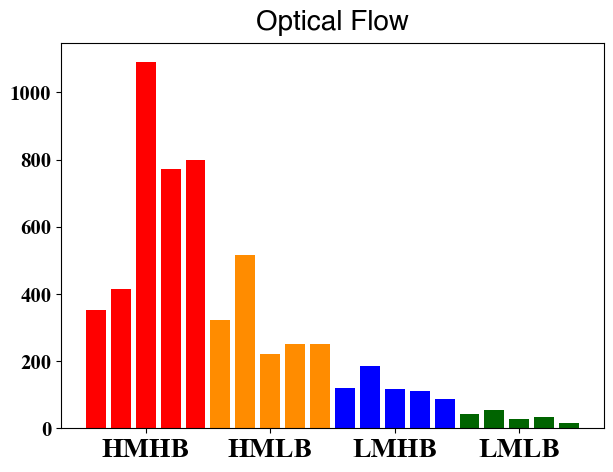

In [20]:
plt.figure(figsize=(7,5))
plt.bar(range(len(feature_arr)), feature_arr.mean(axis=1), color = np.repeat(colors,5))
plt.xticks(range(2,20,5), ["HMHB", "HMLB", "LMHB","LMLB"], family = 'Times New Roman', size = 20, weight = 'bold');
plt.yticks(family = 'Times New Roman', size = 15, weight = 'bold')

plt.title("Optical Flow", fontdict=font_dict, pad=15)


Text(0.5, 1.0, 'Value in HSV')

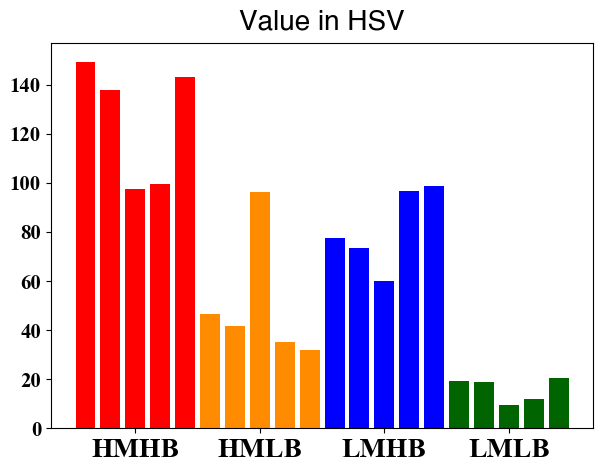

In [21]:
plt.figure(figsize=(7,5))
plt.bar(range(len(v_arr)), v_arr.mean(axis=(1,2,3)), color = np.repeat(colors,5))
plt.xticks(range(2,20,5), ["HMHB", "HMLB", "LMHB","LMLB"], family = 'Times New Roman', size = 20, weight = 'bold');
plt.yticks(family = 'Times New Roman', size = 15, weight = 'bold')

plt.title("Value in HSV", fontdict=font_dict, pad=15)

In [22]:
feature_data = feature_arr.mean(axis=1).reshape(-1,5).mean(axis=1)
v_data = v_arr.mean(axis=(1,2,3)).reshape(-1,5).mean(axis=1)

feature_std = np.std(feature_arr.mean(axis=1).reshape(-1,5), axis= 1)
v_std = np.std(v_arr.mean(axis=(1,2,3)).reshape(-1,5), axis= 1)

feature_se = feature_std / np.sqrt(5)
v_se = v_std / np.sqrt(5)

[685.58203  312.3123   123.65475   35.171764]
[271.76978  107.56903   32.676384  13.143029]
[125.45704544  50.37818516  81.24684594  15.99605839]
[22.34161488 23.57984479 14.65316278  4.31514198]


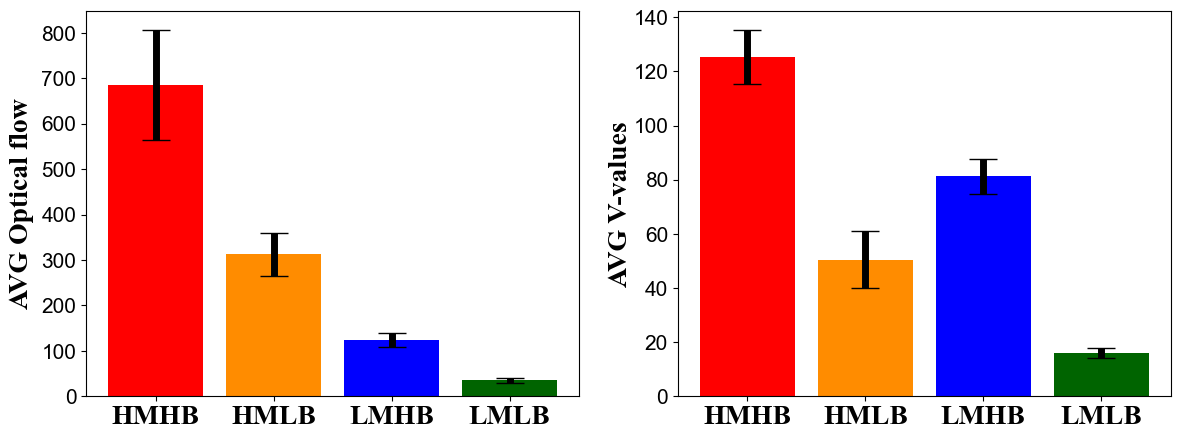

In [78]:
fig, axs = plt.subplots(1,2);
ax1 = axs[0]
ax2 = axs[1]
fig.set_size_inches( 14, 5);

ax1.bar( range(4), feature_data, color=colors, label="Optical flow");
ax2.bar( range(4), v_data, color=colors, label='V-value');

ax1.set_xticks(np.arange(4), ["HMHB", "HMLB", "LMHB","LMLB"], family = 'Times New Roman', size = 20, weight = 'bold');
ax1.set_yticklabels(ax1.get_yticks().astype(int), family = 'Arial', fontsize = 15)
ax2.set_xticks(np.arange(4), ["HMHB", "HMLB", "LMHB","LMLB"], family = 'Times New Roman', size = 20, weight = 'bold');
ax2.set_yticklabels(ax2.get_yticks().astype(int), family = 'Arial', fontsize = 15)


ax1.set_ylabel("AVG Optical flow", family = "Times New Roman", fontsize = 20, labelpad=5, weight = 'bold');
ax2.set_ylabel("AVG V-values", family = "Times New Roman", fontsize = 20, labelpad=0,weight = 'bold' );

ax1.errorbar(range(4), feature_data, feature_se,linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 
ax2.errorbar(range(4), v_data, v_se,linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 


print(feature_data)
print(feature_std)
print(v_data)
print(v_std)

In [ ]:
data_dir = os.getcwd() + "/Raw_SSQ/"
raw_ssq_data= [ x for x in os.listdir( data_dir ) if x.startswith("VFSQ")]

raw_ssq_arr = []
for parti in raw_ssq_data :
    df = pd.read_csv(data_dir+parti, index_col=0)
    raw_ssq_arr.append(df.mean(axis=0))

raw_ssq_arr = np.array(raw_ssq_arr)


In [ ]:
data = raw_ssq_arr.flatten()
blocks = ["Before", 'Block1', 'Block2', 'Block3', 'Block4'] * len(raw_ssq_arr)
names = np.repeat(np.arange(30),5)

df = pd.DataFrame( { 'names' : names, 'rating' : data, 'blocks': blocks})
results = pg.rm_anova( data= df, dv='rating', within='blocks', subject='names', correction=True)
print(results)


post_hoc = pg.pairwise_tests(data= df, dv='rating', within='blocks', subject='names', padjust='bonf')
print("-"*100,'\n')
print(post_hoc)
print("="*100,'\n') 

   Source  ddof1  ddof2         F         p-unc     p-GG-corr       ng2  \
0  blocks      4    116  22.09559  1.409856e-13  1.356390e-09  0.104235   

        eps  sphericity   W-spher   p-spher  
0  0.650974       False  0.343791  0.000596  
---------------------------------------------------------------------------------------------------- 

  Contrast       A       B  Paired  Parametric         T   dof alternative  \
0   blocks  Before  Block1    True        True -3.939994  29.0   two-sided   
1   blocks  Before  Block2    True        True -5.366155  29.0   two-sided   
2   blocks  Before  Block3    True        True -5.808505  29.0   two-sided   
3   blocks  Before  Block4    True        True -6.096419  29.0   two-sided   
4   blocks  Block1  Block2    True        True -4.728227  29.0   two-sided   
5   blocks  Block1  Block3    True        True -4.354140  29.0   two-sided   
6   blocks  Block1  Block4    True        True -4.221535  29.0   two-sided   
7   blocks  Block2  Block3    

[1.86071429 2.34047619 2.70714286 2.77261905 2.78928571]
[0.7836743  0.97471142 1.1195313  1.16224197 1.13469369]


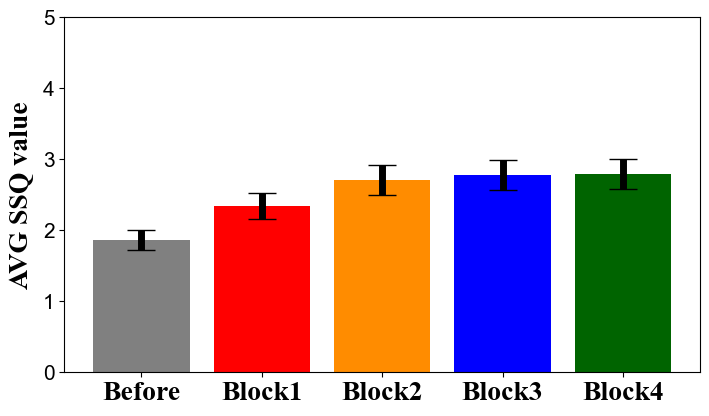

In [ ]:
raw_ssq_std = np.std(raw_ssq_arr, axis=0)
raw_ssq_se = np.std(raw_ssq_arr, axis=0) / np.sqrt(len(raw_ssq_arr))
colors = [ 'gray','r', 'darkorange', 'b','darkgreen']
font_dict = {'family': 'Times New Roman',
      'color':  'black',
      'weight': 'bold',
      'size': 20,
      'va' : 'center',
      'ha' : 'center'}
      
fig = plt.figure(figsize=(8.2,9/16*8.2))
plt.bar(range(raw_ssq_arr.shape[1]), raw_ssq_arr.mean(axis=0), color = colors);
plt.xticks(range(raw_ssq_arr.shape[1]), ["Before", 'Block1', 'Block2', 'Block3', 'Block4'], family="Times New Roman", fontsize=20, weight='bold'); 
plt.ylim(0,5);
plt.yticks(family='Arial',fontsize=15);
plt.errorbar(range(5), raw_ssq_arr.mean(axis=0) ,yerr =raw_ssq_se, linestyle = 'None',capsize=10, capthick=1,elinewidth=5, color='black'); 
plt.ylabel('AVG SSQ value', fontdict=font_dict, labelpad=15) ;

y = raw_ssq_arr.mean(axis=0) + 0.5

print(raw_ssq_arr.mean(axis=0))
print(raw_ssq_std)
# for i, blc in enumerate(raw_ssq_arr.mean(0)): 
#     plt.text(x = i, y= y[i], s= round(blc, 3), fontdict=font_dict, color='black')